In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = '../predictions1week/'
bot_prob = 0.9 # threshold for bot accounts
plt.rcParams['figure.figsize'] = [10, 5]

Add exploration functions by Florian

In [3]:
def explore(df: pd.DataFrame, col: str, continuous: bool = True, index: str = ""):
    """ Shows basic stats and plots histogram / bar plot """
    s = df[col] if continuous else df[col].value_counts()
    print(s.describe())
    
    if continuous:
        s.hist(log=True, bins=20)
    else:
        if index:
            s.index = [
                df[df[col] == idx][index].iloc[0]
                for idx in s.index
            ]
        s[:20].plot.bar(log=True)
    # plt.show()
    
def plot_timestamps(s: pd.Series):
    """ Plot timestamp data (per day) """
    s_count = s.apply(
        lambda date: date.split()[0]
    ).value_counts()
    s_count = s_count.sort_index()
    print(s_count)
    s_count.plot.line()
    plt.show()
    
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    """ Plots scatter plot """
    df.plot.scatter(x, y, logx=True, logy=True, alpha=.002)
    plt.show()

In [4]:
def concat_locations(df_source: pd.DataFrame, df_return: pd.DataFrame, loc_list = list[str]):
    '''append accounts with locations from loc_list in df_source to df_return'''
    for loc in loc_list:
        temp = df_source[df_source['location'] == loc]
        df_return = pd.concat([df_return, temp ])
    print(df_return.shape)
    return df_return

## Load dataset

In [5]:
df = pd.DataFrame()

for filename in os.listdir(path):
    if filename[-4:] == ".csv":
        print(filename)
        temp = pd.read_csv(path + filename, lineterminator = '\n')
        df = pd.concat([ df, temp ])

print(df.shape)
df.head()

predictions262728.csv
predictions293031.csv
(259843, 18)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,bot,no_bot
0,1288991526807248898,drunkiel,ga hunter - rant acc \nturn off my rt pls.,bigwin,1468,195,4684,2020-07-31 00:15:13.000000,1507145236014792712,2022-03-25 00:00:00,876,"WATCHMAN GANG is still early and fresh, join o...",[],NaN,0,2022-03-25 00:06:50.993554,0.0,1.0
1,1235244517307166725,InformazioneA,Aggiornamenti e podcast dedicati a questioni i...,NaN,102,919,9370,2020-03-04 16:43:53.000000,1507145236031709186,2022-03-25 00:00:00,0,#UkraineWar \n#Russia #Ukraine war report #24m...,"[{'text': 'UkraineWar', 'indices': [0, 11]}, {...",NaN,0,2022-03-25 00:06:50.977960,0.0,1.0
2,237064482,thecornerdoteu,#Spain and #EU economies in a global context. ...,Global,1723,1761,51132,2011-01-12 00:36:40.000000,1507145236241285126,2022-03-25 00:00:00,0,"In the short term, the only way for #Europe to...","[{'text': 'Europe', 'indices': [36, 43]}, {'te...",NaN,0,2022-03-25 00:06:50.955455,0.0,1.0
3,173212647,JoeMokolobetsi,Jesus Christ is the only answer | Romans 10:9-...,Afrika Borwa,190,172,3815,2010-07-31 19:09:22.000000,1507145236455251973,2022-03-25 00:00:00,0,@RevMeshoe @AfricanApostles @RhemaSA @PastorXo...,"[{'text': 'UkraineWar', 'indices': [187, 198]}...",NaN,0,2022-03-25 00:02:16.109375,0.0,1.0
4,147167024,SigaMassa,釣り好き / スポーツ観戦 MＩＯ、レイクスを応援中 / 自作PC AMD ASUS信者 /...,滋賀県守山市,3107,836,116111,2010-05-23 11:29:36.000000,1507145236635852801,2022-03-25 00:00:00,417,The Ukrainian flag will now officially fly ove...,"[{'text': 'US', 'indices': [96, 99]}]",NaN,0,2022-03-25 00:06:50.932135,0.0,1.0


## Distribution of bot prediction labels for accounts

count    94807.000000
mean         0.023785
std          0.131947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.994069
Name: bot, dtype: float64


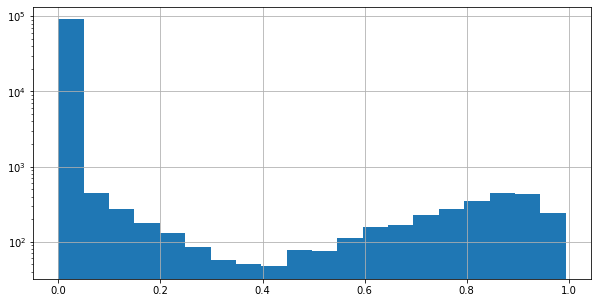

In [6]:
explore(df.drop_duplicates('userid'), 'bot')

Let's check out the bot accounts 

In [7]:
df_bottweets = df[df['bot'] > bot_prob]
print(df_bottweets.shape)
df_botaccounts = df_bottweets.drop_duplicates('userid')
print(df_botaccounts.shape)
df_botaccounts.head()

(1540, 18)
(786, 18)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,bot,no_bot
1062,1500544894237958146,FatDan26062629,"Putin’s a tiny dicked, bitch",NaN,7,0,209,2022-03-06 18:52:59.000000,1507147950916472835,2022-03-25 00:10:47,0,@RusEmbUSA @washingtonpost @mfa_russia @missio...,"[{'text': 'SlavaUkraini', 'indices': [355, 368...",NaN,0,2022-03-25 00:21:36.860237,0.909067,0.090933
1620,1973509819,MajorTechJunkie,NaN,Mars,26,0,56,2013-10-20 01:55:02.000000,1507149384298938372,2022-03-25 00:16:29,0,@olgatokariuk @NATO @SpeakerPelosi @LeaderMcCo...,"[{'text': 'StopPutinNOW', 'indices': [244, 257...",NaN,0,2022-03-25 00:31:08.969082,0.946332,0.053668
2148,1493627836246155266,RolandAranjo1,"I lover of life, liberty and justice for all.","Denver, CO",5,0,38,2022-02-15 16:47:08.000000,1507151248553754625,2022-03-25 00:23:53,0,Fascist #Putin must be stopped immediately bef...,"[{'text': 'Putin', 'indices': [8, 14]}, {'text...",NaN,0,2022-03-25 00:30:57.793657,0.906977,0.093023
2207,1371658361884737538,Aquagemstarmoon,NaN,NaN,1,0,4,2021-03-16 03:03:42.000000,1507151458579501066,2022-03-25 00:24:43,0,"Just thinking, will using nuclear warhead rend...","[{'text': 'UkraineWar', 'indices': [249, 260]}...",NaN,0,2022-03-25 00:32:21.122836,0.936095,0.063905
2482,1507081676056412167,ShowMediaNews1,NaN,NaN,2,0,5,2022-03-24 19:47:41.000000,1507152384149139459,2022-03-25 00:28:24,0,#warukraine #Refugees #Poland #Polonia #guerra...,"[{'text': 'warukraine', 'indices': [0, 11]}, {...",NaN,0,2022-03-25 00:36:50.730312,0.957080,0.042920


### Basic plots for bot accounts

Followers/following: 

count      1.0
mean     786.0
std        NaN
min      786.0
25%      786.0
50%      786.0
75%      786.0
max      786.0
Name: followers, dtype: float64


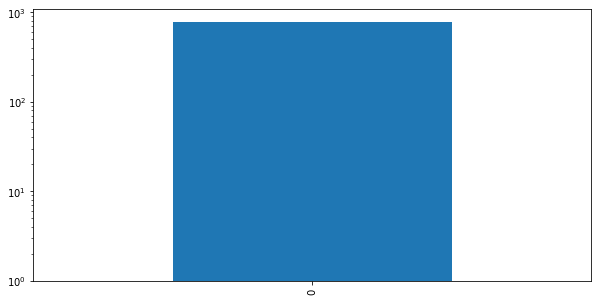

In [8]:
explore(df_botaccounts, 'followers', continuous = False)

count     94.000000
mean       8.361702
std       17.802894
min        1.000000
25%        1.000000
50%        3.000000
75%        6.750000
max      129.000000
Name: following, dtype: float64


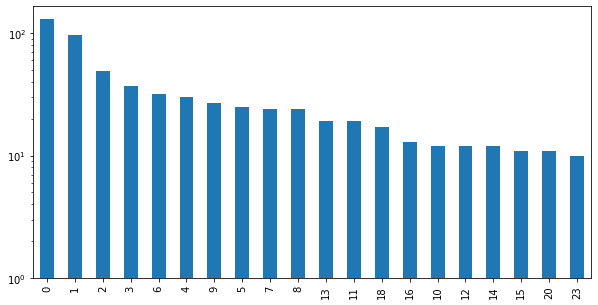

In [9]:
explore(df_botaccounts, 'following', continuous = False)

Tweets per bot accounts

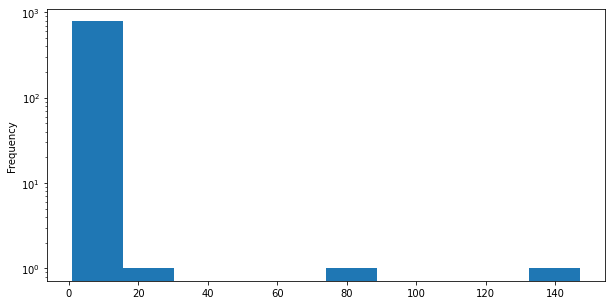

In [10]:
df_bottweets.groupby(['userid'])['tweetid'].count().plot(x = 'number of tweets', kind = 'hist', logy = True)
plt.show()

Compare for all accounts

<AxesSubplot:ylabel='Frequency'>

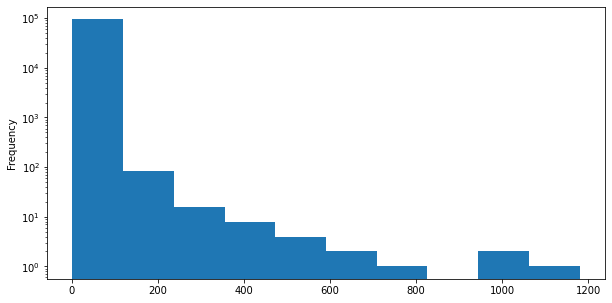

In [11]:
df.groupby(['userid'])['tweetid'].count().plot(x = 'number of tweets', kind = 'hist', logy = True)

Drop tweets with same text

In [12]:
df_bottweets.groupby(['userid'])['text'].count().sort_values(ascending = False)

userid
1502987879521431554    147
1509194192785879042     77
1504949027493883907     20
1441140653019123715     15
1501177210077601793     15
                      ... 
1491726247109570562      1
1491892174828494856      1
1492161731166150659      1
1492291115541741569      1
1509625146696474637      1
Name: text, Length: 786, dtype: int64

In [13]:
# Most active bot (it just spams the same tweet with minimal changes)
df_most_active_bot = df_bottweets[df_bottweets['userid'] == 1387324144929419265]
print(df_most_active_bot.shape)
df_most_active_bot.head()

(3, 18)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,bot,no_bot
62431,1387324144929419265,FreedKomet,NaN,NaN,30,0,7,2021-04-28 08:33:59.000000,1507440166570442760,2022-03-25 19:31:57,1,"Cancel your booking with #TUI, book directly w...","[{'text': 'TUI', 'indices': [25, 29]}, {'text'...",NaN,1,2022-03-25 19:38:42.744774,0.907701,0.092299
62652,1387324144929419265,FreedKomet,NaN,NaN,30,0,8,2021-04-28 08:33:59.000000,1507441006735679499,2022-03-25 19:35:17,0,On the hands of #TUI and every single booking ...,"[{'text': 'TUI', 'indices': [16, 20]}, {'text'...",NaN,0,2022-03-25 19:53:36.356039,0.934860,0.065140
64467,1387324144929419265,FreedKomet,NaN,NaN,30,0,9,2021-04-28 08:33:59.000000,1507449847036719112,2022-03-25 20:10:25,0,"#ONEPIECE1044 - Peace for creative, also in #U...","[{'text': 'ONEPIECE1044', 'indices': [0, 13]},...",NaN,0,2022-03-25 20:23:43.071686,0.923023,0.076977


Plot creation dates of bot accounts

2009-06-07     1
2009-06-24     1
2009-06-29     1
2009-09-19     1
2009-10-21     1
              ..
2022-03-27    10
2022-03-28    18
2022-03-29    34
2022-03-30    27
2022-03-31    23
Name: usercreatedts, Length: 283, dtype: int64


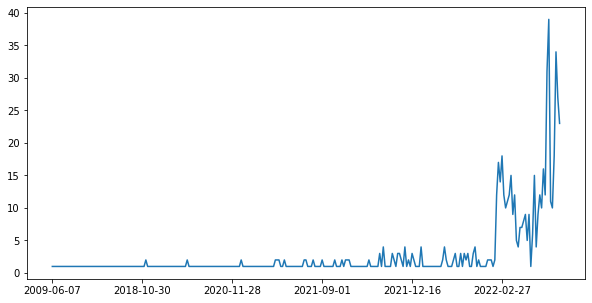

In [14]:
plot_timestamps(df_botaccounts['usercreatedts'])

2006-07-16     34
2006-07-20      2
2006-07-21      1
2006-08-29      1
2006-10-24      1
             ... 
2022-03-27    298
2022-03-28    619
2022-03-29    444
2022-03-30    524
2022-03-31    146
Name: usercreatedts, Length: 5466, dtype: int64


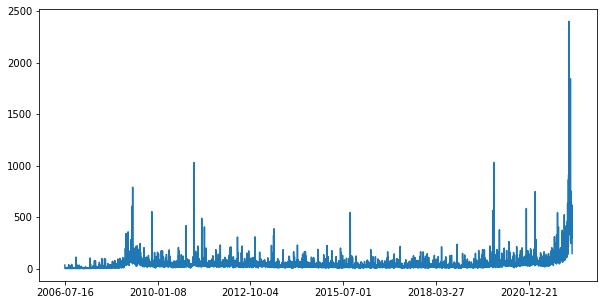

In [15]:
plot_timestamps(df['usercreatedts'])

## Locations of bot accounts

In [16]:
df_botaccounts.groupby(['location'])['userid'].count().sort_values(ascending = False)

location
Ukraine                           10
Украина                            9
United States                      6
Україна                            6
United Kingdom                     3
                                  ..
Fukuoka-shi Sawara-ku, Fukuoka     1
Everywhere                         1
Estonia                            1
Essen, Germany                     1
香港                                 1
Name: userid, Length: 145, dtype: int64

In [17]:
# df_botaccounts['location'].value_counts().plot(x = 'location', kind = 'bar')
# plt.rcParams['figure.figsize'] = [100, 10]
# plt.show()
print(df_botaccounts.drop_duplicates(['location'])['location'].tolist())

[nan, 'Mars', 'Denver, CO', 'Serbia', 'New York', 'in your closet 😈🥶🥶🥶🥶😈😈', 'Montreal', '美国纽约', 'Simulation!', 'Ukraine', "Utrecht M'n Stadje, Nederland", 'Chennai, India', 'not UK', '#TelAviv', 'секрет', 'califronia,usa', 'CRYPTO WORLD', 'New Taipei City, Taiwan', 'Украина', 'Singapore ', 'Brussel, België', 'Nederland', 'sumy', 'Rajasthan ', 'Україна', 'California, USA', 'Los Angeles, CA', 'Sydney-NSW-Australia', 'Zhytomyr, Ukraine ', 'United States', 'Polska', 'Norway', 'Dubai UAE', 'Chernivtsi ', 'Suomi', 'India', 'United Kingdom', 'Japan', 'Worldwide', 'Anzio ', 'Hong Kong', 'Tokyo-to, Japan', 'Austin, TX', 'AZ, Baku 🇦🇿', 'Everywhere', '香港', 'Kyiv', 'USA', 'poland', 'US', '#UKR', 'Paris et Formentera', 'Lviv, Ukraine', 'Assyria', 'Indianapolis, IN/ Florida ', 'Australia', 'Los Angeles', 'Canada', 'UK 🇬🇧', 'Our team is from 7 to 70 years', 'Budapest, Magyarország', 'Lyon, France', 'Estonia', 'Deutschland', '日本', 'Anywhere and Everywhere 🖕', 'volatility', 'Atlantis', 'Albion', 'Tacom

In [18]:
# Extract bot accounts from Ukraine, Russia and USA - not complete!
df_ukrainebots = pd.DataFrame()
df_ukrainebots = concat_locations(
    df_bottweets, 
    df_ukrainebots, 
    ['Kyiv', 'Ukraine', 'Kiev', 'Україна', 'Украина', 'Kharkiv. Ukraine', 
     'kyiv, ukraine ', 'Kyiv, Ukraine', 'Україна, Київ', 'Ukrania', 'Україна, Ірпінь']
)

df_russiabots = pd.DataFrame() # Actually seem to be Ukrainian accounts judging from the content
df_russiabots = concat_locations(
    df_bottweets, 
    df_russiabots, 
    ['Russia, the DADDYland', 'Russia']
)

df_usabots = pd.DataFrame()
df_usabots = concat_locations(
    df_bottweets,
    df_usabots, 
    ['United states ', 'United States 🇺🇸 ','United States',
     'United State', 'PALM SPRING CALIFORNIA^ARCORE^','Los Angeles, CA',
     'North Carolina, USA', 'Oregon, USA', 
     'Texas, United States.', 'Texas, USA', 'Texas, Austin', 
     'Murica', 'Texas'])

df_ukrainebots.shape

(59, 18)
(3, 18)
(27, 18)


(59, 18)

## Download subsets for exploration of content

In [19]:
# sorting for easier legibility
df_bottweets = df_bottweets.sort_values('userid', ascending = False)
df_botaccounts = df_botaccounts.sort_values('location', ascending = False)
df_ukrainebots = df_ukrainebots.sort_values('userid', ascending = False)
df_russiabots = df_russiabots.sort_values('userid', ascending = False)
df_usabots = df_usabots.sort_values('userid', ascending = False)

In [20]:
df_botaccounts.to_csv(path + '/subsets/predictions262728_botaccounts.csv')
df_bottweets.to_csv(path + '/subsets/predictions262728_bottweets.csv')
df_ukrainebots.to_csv(path + '/subsets/predictions262728_botsukraine.csv')
df_most_active_bot.to_csv(path + '/subsets/predictions262728_most_active_bot.csv')
df_russiabots.to_csv(path + '/subsets/predictions262728_russiabots.csv')
df_usabots.to_csv(path + '/subsets/predictions262728_usabots.csv')